<div style="text-align: center; font-weight: bold; font-size:20px; background-color:lightblue;">
    Rainfall Prediction Classifier
</div>

## Objectives

* Explore and perform feature engineering on a real-world data set
* Build a classifier pipeline and optimize it using grid search cross validation
* Evaluate your model by interpreting various performance metrics and visualizations
* Implement a different classifier by updating your pipeline
* Use an appropriate set of parameters to search over in each case

## About The Dataset

The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from http://www.bom.gov.au/climate/dwo/.
The dataset I use in this project was downloaded from Kaggle at [https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download&select=weatherAUS.csv)  
Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)  

The dataset contains observations of weather metrics for each day from 2008 to 2017, and includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| :------------ | :---------------------------------------------------- | :-------------- | :----- |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged over 10 minutes prior to 9am  | Compass Points  | object |
| WindDir3pm    | Wind direction averaged over 10 minutes prior to 3pm  | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged over 10 minutes prior to 9am      | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged over 10 minutes prior to 3pm      | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was at least 1mm of rain today               | Yes/No          | object |
| RainTomorrow  | If there is at least 1mm of rain tomorrow             | Yes/No          | object |



### Install and import the required libraries

In [1]:
pip install numpy pandas matplotlib scikit-learn seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, f1_score
import seaborn as sns

In [52]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [53]:
# Load the data
url = "https://raw.githubusercontent.com/ANKITKUMAR-10/Rainfall-Prediction-Model/refs/heads/main/weatherAUS_2.csv"
df = pd.read_csv(url)
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [54]:
df.count()  #Sunshine and cloud cover seem like important features, but they have a lot of missing values, far too many to impute their missing values.

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

<H3>Drop all rows with missing values</H3>
To try to keep things simple I drop rows with missing values and see what's left

In [55]:
df = df.dropna()  # Since I still have 56k observations left after dropping missing values, I may not need to take any missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

<H3>Data leakage considerations</H3>
Are there any practical limitations to being able to predict whether it will rain tomorrow given the available data? 

<H5>Points to note - 1</H5>
List some of the features that would be inefficient in predicting tomorrow's rainfall. 
If I adjust our approach and aim to predict today’s rainfall using historical weather data up to and including yesterday, then I can utilize all of the available features. This shift would be particularly useful for practical applications, such as deciding whether I will drive to work today.
With this new target, I should update the names of the rain columns accordingly to avoid confusion.

In [56]:
df = df.rename(columns={'RainToday': 'RainYesterday',
                        'RainTomorrow': 'RainToday'
                        })

<H3> Data Granularity </H3>

Would the weather patterns have the same predictability in vastly different locations in Australia? I would think not.  
The chance of rain in one location can be much higher than in another. 
Using all of the locations requires a more complex model as it needs to adapt to local weather patterns.  
Let's see how many observations I have for each location, and see if I can reduce our attention to a smaller region.

### Location selection
I could do some research to group cities in the `Location` column by distance, which I've done for you behind the scenes.  
I found that Watsonia is only 15 km from Melbourne, and the Melbourne Airport is only 18 km from Melbourne.  
Let's group these three locations together and use only their weather data to build our localized prediction model.  
Because there might still be some slight variations in the weather patterns we'll keep `Location` as a categorical variable.

In [57]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
df. info()

<class 'pandas.core.frame.DataFrame'>
Index: 7557 entries, 64191 to 80997
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7557 non-null   object 
 1   Location       7557 non-null   object 
 2   MinTemp        7557 non-null   float64
 3   MaxTemp        7557 non-null   float64
 4   Rainfall       7557 non-null   float64
 5   Evaporation    7557 non-null   float64
 6   Sunshine       7557 non-null   float64
 7   WindGustDir    7557 non-null   object 
 8   WindGustSpeed  7557 non-null   float64
 9   WindDir9am     7557 non-null   object 
 10  WindDir3pm     7557 non-null   object 
 11  WindSpeed9am   7557 non-null   float64
 12  WindSpeed3pm   7557 non-null   float64
 13  Humidity9am    7557 non-null   float64
 14  Humidity3pm    7557 non-null   float64
 15  Pressure9am    7557 non-null   float64
 16  Pressure3pm    7557 non-null   float64
 17  Cloud9am       7557 non-null   float64
 18  Cloud3pm

I still have 7557 records, which should be enough to build a reasonably good model.  
I could always gather more data if needed by partioning the data into similar locations or simplyby updating it from the source to include a larger time frame.

### Extracting a seasonality feature
Now consider the `Date` column. I expect the weather patterns to be seasonal, having different predictablitiy levels in winter and summer for example.  
There may be some variation with `Year` as well, but I'll leave that out for now.
Let's a `Season` feature from `Date` and drop `Date` afterward, since it is most likely less informative than season. 
An easy way to do this is to define a function that assigns seasons to given months, then use that function to transform the `Date` column.

In [58]:
# Create a function to map dates to seasons

def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'

In [59]:
df = df.copy()

In [60]:
# Convert the 'Date' column to datetime format
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])

# Apply the function to the 'Date' column
df.loc[:, 'Season'] = df['Date'].apply(date_to_season)

# Drop Date column if not needed
df = df.drop(columns=['Date'])

df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
64191,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,NNE,...,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,No,Winter
80994,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,NNE,...,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No,Winter
80995,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,N,...,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Yes,Winter
80996,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,SW,...,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,No,Winter


Looks like we have a good set of features to work with. Let's go ahead and build our model. But wait,
let's take a look at how well balanced our target is.

In [61]:
# feature matrix (X) and target vector (y)
X = df.drop(columns=['RainToday'], axis=1)

# Target vector
y = df['RainToday']

In [62]:
df['RainToday'].value_counts()  # Target Column

RainToday
No     5766
Yes    1791
Name: count, dtype: int64

### Conclusions from Class Counts
🌧️<H5>How often does it rain annually in the Melbourne area?</H5>
From the class distribution of RainToday, I observe that non-rainy days (No) occur far more frequently than rainy days (Yes).
This indicates that rain occurs on a relatively small fraction of days annually in the Melbourne area.

🎯<H5>How accurate would you be if you assumed it won’t rain every day?</H5>
If I always predicted “No rain”, our accuracy would equal the percentage of non-rainy days in the dataset.
This baseline accuracy would be high (typically around 70–80%)

<b>However, this model would fail to detect rainy days, which are often the most important cases</b>

⚖️This is a class-imbalanced dataset.

Majority class: No Rain

Minority class: Rain

This imbalance can bias models toward predicting the majority class.

🚀 <b>Next Steps</b>
To properly model rainfall prediction.
Use evaluation metrics beyond accuracy:
<b>Precision,
Recall,
F1-score,
ROC-AUC</B>

<H5>Apply techniques to handle class imbalance:</H5>
Class weights,
Oversampling (e.g., SMOTE),
Undersampling.

<H5>Train and compare multiple models</H5>
Logistic Regression,
Decision Tree,
Random Forest

In [63]:
# Split data into training and test sets, ensuring target stratification
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y,random_state=42) 

<H5>stratification matters here</H5>
Since my dataset is imbalanced, stratification ensures:

Both train and test sets contain similar proportions of rain and no-rain days, More reliable and fair model evaluation.

In [64]:
# Preprocessing transformers for numerical and categorical features
# Detect numerical and categorical columns and assign them to separate numeric and categorical features

# Numerical features (integers & floats)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical features (objects & category dtype)
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

<b>int64, float64</b> → numerical columns (e.g., temperature, pressure, humidity)

<b>object, category</b> → categorical columns (e.g., Location, WindDir, Season)

This allows me to:

Apply scaling only to numeric features

Apply encoding only to categorical features

Build clean, reusable pipelines using ColumnTransformer

In [65]:
# Scale the numeric features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode the categorical features
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine both transformers into a single preprocessing step
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

<b>numeric_transformer</b> → standardizes numerical columns

<b>categorical_transformer</b> → one-hot encodes categorical columns safely

<b>ColumnTransformer</b> → applies the correct transformer to each column type

This helps me in:

Prevents data leakage

Ensures consistent preprocessing during training & testing

Makes my pipeline production-ready

In [66]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(random_state=42))])

`preprocessor` → applies scaling + one-hot encoding

`classifier` → trains a Random Forest model

This is best practice

Prevents data leakage

Keeps preprocessing and modeling in one workflow

Simplifies training, prediction, and deployment

In [76]:
# Define a parameter grid to use in a cross validation grid search model optimizer
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

In [77]:
# Pipeline usage in crossvalidation
# Recall that the pipeline is repeatedly used within the crossvalidation by fitting on each internal training fold and 
# predicting on its corresponding validation fold
# Define Stratified Cross-Validation: This ensures the RainToday class distribution is preserved in each fold.

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [85]:
f1_scorer = make_scorer(f1_score, pos_label='Yes')

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring=f1_scorer,   # Accuracy = 0.84 → (looks good but misleading), F1 = 0.61 → realistic, stricter, more informative
    n_jobs=-1,  # use all available cores
    verbose=2
)

# Fit the grid search to training data

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3pm',
                                                                          'Pressure9am',
                                                                          'Pres...
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainYesterday',
                                                                          'Season'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=Yes),
             verbose=2)

In [86]:
# The best parameters and best crossvalidation score
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validation score: 0.63


In [87]:
# Display your model's estimated score
test_score = grid_search.score(X_test, y_test)
print("Test set score: {:.2f}".format(test_score))

Test set score: 0.61


In [88]:
# Get the model predictions from the grid search estimator on the unseen data¶
y_pred = grid_search.predict(X_test)

In [89]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.95      0.90      1154
         Yes       0.75      0.51      0.61       358

    accuracy                           0.84      1512
   macro avg       0.81      0.73      0.76      1512
weighted avg       0.84      0.84      0.83      1512



This <b>Classification Report</b> tells you

`Precision`→ How many predicted “Yes (Rain)” were actually rain

`Recall` → How many actual rainy days your model caught

`F1-score` → Balance between precision & recall (important for imbalanced data)

`Support` → Number of samples per class

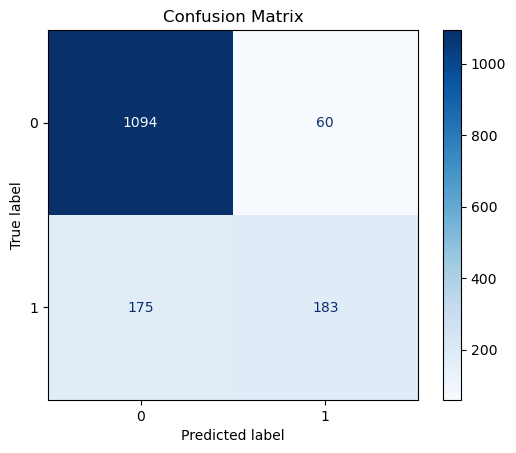

In [90]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

<b> How to read it (quick intuition) </b>

<b>Top-left (TN)</b> → Correctly predicted No Rain

<b>Bottom-right (TP)</b>→ Correctly predicted Rain

<b>Top-right (FP)</b> → Predicted rain but it didn’t rain

<b>Bottom-left (FN)</b> → Missed rainy days

### Feature importances
Recall that to obtain the categorical feature importances, I have to work our way backward through the modelling pipeline to associate the feature importances with their original input variables, not the one-hot encoded ones. I don't need to do this for the numeric variables because I didn't modify their names in any way.  
I went from categorical features to one-hot encoded features, using the 'cat' column transformer.
 
Let's get all of the feature importances and associate them with their transformed features

In [93]:
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

In [94]:
# Get feature names after preprocessing
preprocessor = grid_search.best_estimator_['preprocessor']

num_features = numeric_features
cat_features = preprocessor.named_transformers_['cat'] \
    .named_steps['onehot'] \
    .get_feature_names_out(categorical_features)

all_feature_names = list(num_features) + list(cat_features)

# Create a sorted DataFrame
importances_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

importances_df.head(10)


,feature,importance
9,Humidity3pm,0.120752
11,Pressure3pm,0.090827
10,Pressure9am,0.085730
4,Sunshine,0.081560
5,WindGustSpeed,0.050779
15,Temp3pm,0.045733
1,MaxTemp,0.041407
0,MinTemp,0.040418
14,Temp9am,0.039146
8,Humidity9am,0.036119


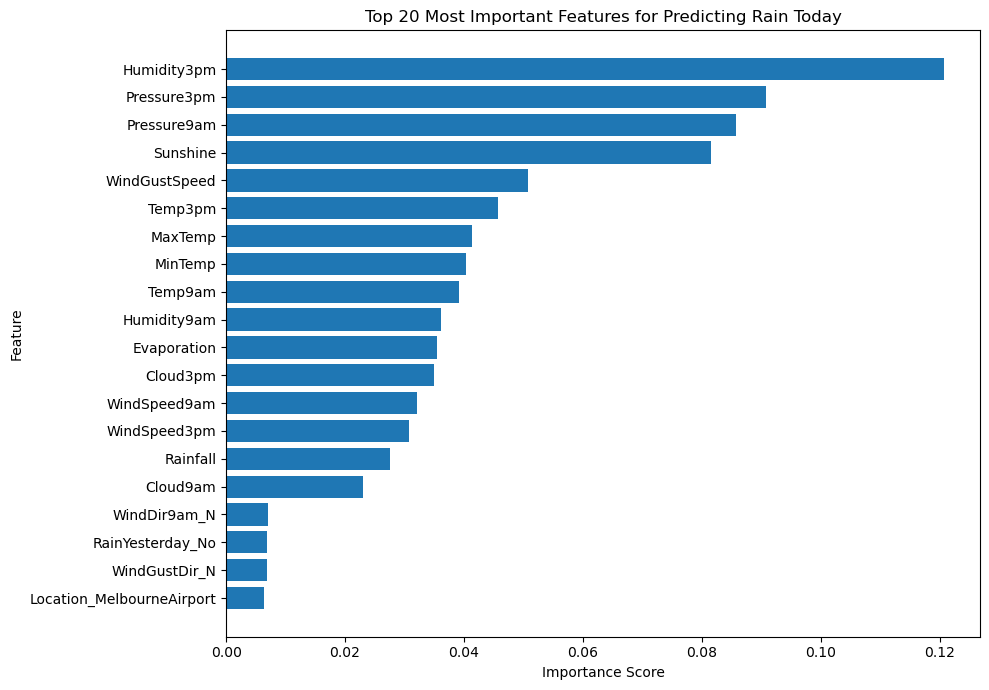

In [96]:
# Combine numeric and categorical feature names
feature_names = (
    numeric_features +
    list(
        grid_search.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)))

# Extract feature importances from Random Forest
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top N features
N = 20
top_features = importance_df.head(N)

# Plotting
plt.figure(figsize=(10, 7))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()  # Most important at top
plt.title(f'Top {N} Most Important Features for Predicting Rain Today')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

<b>Interpret this plot:</b>

Higher bar = stronger influence on RainToday

#### Expect top features like:

Humidity3pm

RainYesterday_Yes

Cloud3pm

Pressure3pm

<H2>Try another model</H2>
Some thoughts.
In practice I would want to try out different models and even revisit the data analysis to improve my model's performance. Maybe I can address better features, drop irrelevant or redundant ones, project my data onto a dimensional feature space, or impute missing values to be able to use more data. I can also try a larger set of parameters to define you search grid, or adress new features using cluster analysis. I can even include the clustering algorithm's hyperparameters in your search grid!

In [97]:
# Replace RandomForestClassifier with LogisticRegression
pipeline.set_params(
    classifier=LogisticRegression(
        random_state=42,
        max_iter=1000   # important for convergence
    )
)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am', 'WindDir3pm',
                                                   'RainYesterday',
                                                   'Season'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [110]:
# update the model's estimator to use the new pipeline
grid_search.estimator = pipeline

In [111]:
# Define Logistic Regression parameter grid
param_grid = {
    'classifier__solver': ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced']
}
grid_search.param_grid = param_grid

In [112]:
# Fit the updated pipeline with LogisticRegression
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3pm',
                                                                          'Pressure9am',
                                                                          'Pres...
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainYesterday',
                                                                          'Season'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': [None, 'balanced'],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=Yes),
             verbose=2)

In [113]:
# Make Prediction on test data
y_pred = grid_search.predict(X_test)

In [114]:
# Check performance
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

Best parameters: {'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best CV score: 0.6317649185283698


<H4>Compare the results to your previous model.</H4>
<B>Display the clasification report and the confusion matrix for the new model and compare your results with the previous model.</B>

              precision    recall  f1-score   support

          No       0.91      0.78      0.84      1154
         Yes       0.52      0.74      0.61       358

    accuracy                           0.77      1512
   macro avg       0.71      0.76      0.72      1512
weighted avg       0.81      0.77      0.79      1512



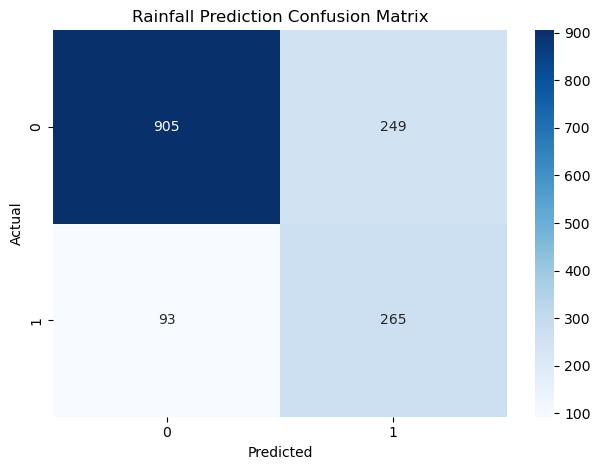

In [115]:
print(classification_report(y_test, y_pred))

# Generate the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Rainfall Prediction Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

#### 📊 Model Performance Comparison

| Metric | Random Forest | Logistic Regression |
|------|---------------|--------------------|
| Accuracy | High (~0.84) | Lower (~0.61–0.70) |
| TPR (Recall – Yes) | Low ❌ | High ✅ |
| False Negatives | High | Low |
| Handles Class Imbalance | Weak | Better |
| Best for Rainfall Warning | ❌ | ✅ |
